In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv('air_passenger.csv')

In [7]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
data=data.rename(columns={'#Passengers':'Passengers'})

In [9]:
data.head(2)

,Month,Passengers
0,1949-01,112
1,1949-02,118


In [10]:
data['year']=pd.DatetimeIndex(data['Month']).year

In [11]:
data.head(2)

,Month,Passengers,year
0,1949-01,112,1949
1,1949-02,118,1949


In [12]:
data['month']=pd.DatetimeIndex(data['Month']).month

In [13]:
data.head(2)

,Month,Passengers,year,month
0,1949-01,112,1949,1
1,1949-02,118,1949,2


In [14]:
data.drop(['Month'],axis=1,inplace=True)

In [15]:
data.head(2)

,Passengers,year,month
0,112,1949,1
1,118,1949,2


Text(0, 0.5, 'No. of Passengers')

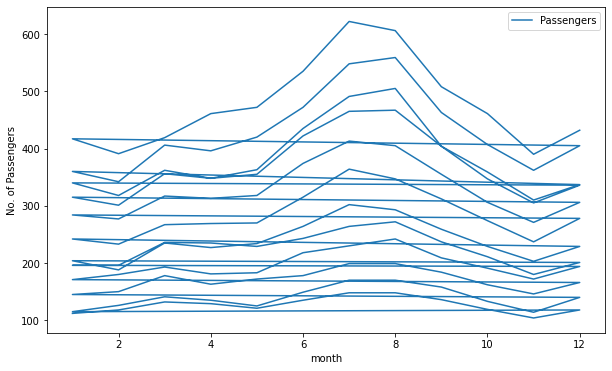

In [16]:
#data visualization
#plot between month and passengers
data.plot(x='month',y='Passengers',figsize=(10,6))
plt.xlabel('month')
plt.ylabel('No. of Passengers')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

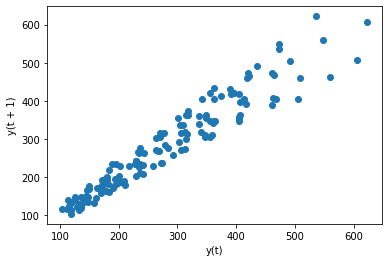

In [17]:
#lag plot
pd.plotting.lag_plot(data['Passengers'])

<AxesSubplot:xlabel='year', ylabel='Passengers'>

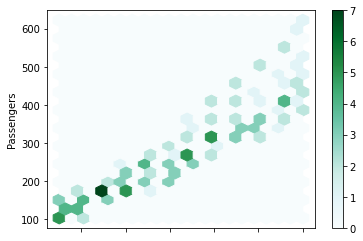

In [18]:
#hexbin plot
data.plot.hexbin(x='year',y='Passengers',gridsize=20)

<AxesSubplot:xlabel='month', ylabel='Passengers'>

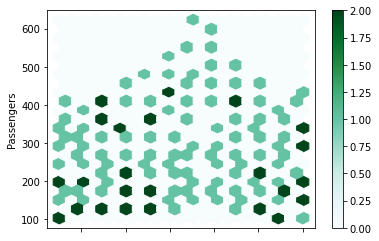

In [19]:
data.plot.hexbin(x='month',y='Passengers',gridsize=20)

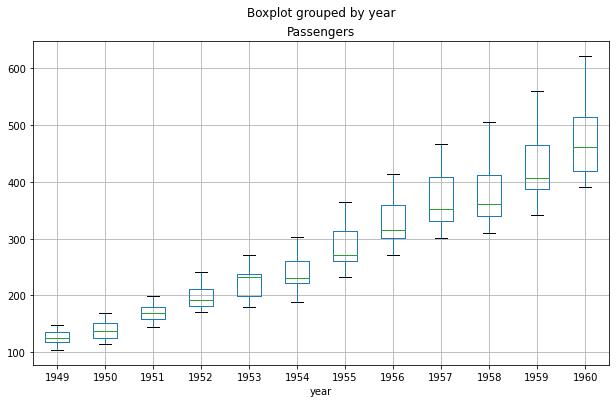

In [20]:
#box plot
a=data.boxplot(figsize=(10,6),by='year',column='Passengers')

In [23]:
!pip install seaborn

  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)


You should consider upgrading via the 'c:\users\teja bros\.conda\envs\python=3.8\python.exe -m pip install --upgrade pip' command.


<AxesSubplot:xlabel='year', ylabel='Passengers'>

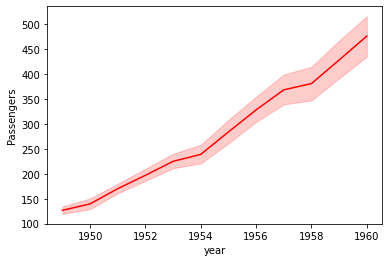

In [24]:
#lineplot between year and passengers
#import seaborn library
import seaborn as sns
sns.lineplot(x='year',y='Passengers',data=data,color='red')

<AxesSubplot:xlabel='month', ylabel='Passengers'>

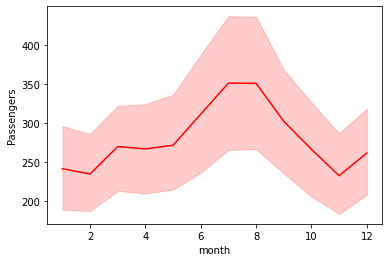

In [25]:
#lineplot between month and passengers
import seaborn as sns
sns.lineplot(x='month',y='Passengers',data=data,color='red')


In [26]:
#assiging data to train_df
train_df = pd.DataFrame(data)

In [27]:
# split into train and test sets
#considering 90% data as train set and 10% as test set 
train_len =  int(0.9*len(train_df))
test_len = len(train_df) - train_len

train,test = train_df.iloc[:train_len],train_df.iloc[train_len:len(train_df)]
print(train_df.shape,train.shape,test.shape)

(144, 3) (129, 3) (15, 3)


In [28]:
train_len

129

In [29]:
#import robust scaler
from sklearn.preprocessing import RobustScaler
#create object to scaler
rs = RobustScaler()
rs_pas = RobustScaler()

#to which columns apply scaling
t_c = ['year','month']
#normalize year and month column
train.loc[:,t_c] = rs.fit_transform(train[t_c].values)
test.loc[:,t_c] = rs.transform(test[t_c].values)

C:\Users\teja bros\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\teja bros\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [30]:
train['Passengers'] = rs_pas.fit_transform(train[['Passengers']])
test['Passengers'] = rs_pas.transform(test[['Passengers']])

C:\Users\teja bros\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\teja bros\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [31]:
test

,Passengers,year,month
129,1.030303,0.833333,0.666667
130,0.757576,0.833333,0.833333
131,1.018182,0.833333,1.000000
132,1.090909,1.000000,-0.833333
133,0.933333,1.000000,-0.666667
134,1.103030,1.000000,-0.500000
135,1.357576,1.000000,-0.333333
136,1.424242,1.000000,-0.166667
137,1.806061,1.000000,0.000000
138,2.333333,1.000000,0.166667


In [32]:
train

,Passengers,year,month
0,-0.757576,-0.833333,-0.833333
1,-0.721212,-0.833333,-0.666667
2,-0.636364,-0.833333,-0.500000
3,-0.654545,-0.833333,-0.333333
4,-0.703030,-0.833333,-0.166667
...,...,...,...
124,1.109091,0.833333,-0.166667
125,1.424242,0.833333,0.000000
126,1.884848,0.833333,0.166667
127,1.951515,0.833333,0.333333


In [33]:
#converting test and train sets into numpy array
train.values
test.values

array([[ 1.03030303,  0.83333333,  0.66666667],
       [ 0.75757576,  0.83333333,  0.83333333],
       [ 1.01818182,  0.83333333,  1.        ],
       [ 1.09090909,  1.        , -0.83333333],
       [ 0.93333333,  1.        , -0.66666667],
       [ 1.1030303 ,  1.        , -0.5       ],
       [ 1.35757576,  1.        , -0.33333333],
       [ 1.42424242,  1.        , -0.16666667],
       [ 1.80606061,  1.        ,  0.        ],
       [ 2.33333333,  1.        ,  0.16666667],
       [ 2.23636364,  1.        ,  0.33333333],
       [ 1.64242424,  1.        ,  0.5       ],
       [ 1.35757576,  1.        ,  0.66666667],
       [ 0.92727273,  1.        ,  0.83333333],
       [ 1.18181818,  1.        ,  1.        ]])

In [34]:
## convert an array of values into a dataset matrix
def create_dataset(x,y,time_steps=1):
#create an empty lists
    x_train,y_train = [],[]
#time step is the next how many sequence of output
    for i in range(len(x)-time_steps):
        v = x.iloc[i:(i+time_steps)].values
#appending values to a lists
        x_train.append(v)
        y_train.append(y.iloc[i+time_steps])
#returning the list of arrays
    return np.array(x_train),np.array(y_train)

In [35]:
time_steps = 1

x_train,y_train = create_dataset(train,train.Passengers,time_steps)
x_test,y_test = create_dataset(test,test.Passengers,time_steps)

print(x_train.shape,y_train.shape)

(128, 1, 3) (128,)


In [37]:
#import keras library
import keras
#import sequential from keras
from tensorflow.keras.models import Sequential
#import different layers
from tensorflow.keras.layers import Dense,LSTM ,Bidirectional,Dropout

In [38]:
#intialise the sequential model
model = Sequential()
#add LSTM network layer 
model.add(Bidirectional(LSTM(128,
                            input_shape=(1,3))))
#add dropout layer
model.add(Dropout(0.25))
#add dense layer i.e. Output layer
model.add(Dense(1))
#trainig the model
model.compile(loss='mse',optimizer='adam')

In [39]:
history = model.fit(x_train,y_train,
                   epochs=400,
                   batch_size=32,
                   validation_split=0.1,
                   shuffle=False 
                   )

Epoch 1/400
4/4 [==============================] - 6s 175ms/step - loss: 0.3226 - val_loss: 1.2903
Epoch 2/400
4/4 [==============================] - 0s 11ms/step - loss: 0.2932 - val_loss: 1.1932
Epoch 3/400
4/4 [==============================] - 0s 15ms/step - loss: 0.2723 - val_loss: 1.0966
Epoch 4/400
4/4 [==============================] - 0s 16ms/step - loss: 0.2490 - val_loss: 1.0028
Epoch 5/400
4/4 [==============================] - 0s 16ms/step - loss: 0.2273 - val_loss: 0.9121
Epoch 6/400
4/4 [==============================] - 0s 13ms/step - loss: 0.2066 - val_loss: 0.8247
Epoch 7/400
4/4 [==============================] - 0s 15ms/step - loss: 0.1910 - val_loss: 0.7406
Epoch 8/400
4/4 [==============================] - 0s 20ms/step - loss: 0.1700 - val_loss: 0.6599
Epoch 9/400
4/4 [==============================] - 0s 12ms/step - loss: 0.1547 - val_loss: 0.5827
Epoch 10/400
4/4 [==============================] - 0s 17ms/step - loss: 0.1363 - val_loss: 0.5095
Epoch 11/400
4/4 [

Epoch 84/400
4/4 [==============================] - 0s 11ms/step - loss: 0.0200 - val_loss: 0.0865
Epoch 85/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0226 - val_loss: 0.0870
Epoch 86/400
4/4 [==============================] - 0s 12ms/step - loss: 0.0215 - val_loss: 0.0878
Epoch 87/400
4/4 [==============================] - 0s 12ms/step - loss: 0.0204 - val_loss: 0.0890
Epoch 88/400
4/4 [==============================] - 0s 9ms/step - loss: 0.0209 - val_loss: 0.0899
Epoch 89/400
4/4 [==============================] - 0s 12ms/step - loss: 0.0219 - val_loss: 0.0901
Epoch 90/400
4/4 [==============================] - 0s 11ms/step - loss: 0.0223 - val_loss: 0.0891
Epoch 91/400
4/4 [==============================] - 0s 20ms/step - loss: 0.0210 - val_loss: 0.0884
Epoch 92/400
4/4 [==============================] - 0s 10ms/step - loss: 0.0197 - val_loss: 0.0882
Epoch 93/400
4/4 [==============================] - 0s 10ms/step - loss: 0.0207 - val_loss: 0.0881
Epoch 94/40

4/4 [==============================] - 0s 11ms/step - loss: 0.0190 - val_loss: 0.0961
Epoch 167/400
4/4 [==============================] - 0s 12ms/step - loss: 0.0206 - val_loss: 0.0955
Epoch 168/400
4/4 [==============================] - 0s 10ms/step - loss: 0.0189 - val_loss: 0.0930
Epoch 169/400
4/4 [==============================] - 0s 10ms/step - loss: 0.0201 - val_loss: 0.0909
Epoch 170/400
4/4 [==============================] - 0s 11ms/step - loss: 0.0197 - val_loss: 0.0904
Epoch 171/400
4/4 [==============================] - 0s 10ms/step - loss: 0.0205 - val_loss: 0.0904
Epoch 172/400
4/4 [==============================] - 0s 9ms/step - loss: 0.0202 - val_loss: 0.0909
Epoch 173/400
4/4 [==============================] - 0s 11ms/step - loss: 0.0201 - val_loss: 0.0914
Epoch 174/400
4/4 [==============================] - 0s 10ms/step - loss: 0.0213 - val_loss: 0.0923
Epoch 175/400
4/4 [==============================] - 0s 10ms/step - loss: 0.0196 - val_loss: 0.0926
Epoch 176/400
4

4/4 [==============================] - 0s 11ms/step - loss: 0.0196 - val_loss: 0.0905
Epoch 249/400
4/4 [==============================] - 0s 11ms/step - loss: 0.0186 - val_loss: 0.0896
Epoch 250/400
4/4 [==============================] - 0s 10ms/step - loss: 0.0204 - val_loss: 0.0891
Epoch 251/400
4/4 [==============================] - 0s 9ms/step - loss: 0.0195 - val_loss: 0.0896
Epoch 252/400
4/4 [==============================] - 0s 10ms/step - loss: 0.0188 - val_loss: 0.0898
Epoch 253/400
4/4 [==============================] - 0s 11ms/step - loss: 0.0197 - val_loss: 0.0901
Epoch 254/400
4/4 [==============================] - 0s 10ms/step - loss: 0.0197 - val_loss: 0.0896
Epoch 255/400
4/4 [==============================] - 0s 11ms/step - loss: 0.0179 - val_loss: 0.0898
Epoch 256/400
4/4 [==============================] - 0s 10ms/step - loss: 0.0203 - val_loss: 0.0895
Epoch 257/400
4/4 [==============================] - 0s 10ms/step - loss: 0.0182 - val_loss: 0.0893
Epoch 258/400
4

4/4 [==============================] - 0s 11ms/step - loss: 0.0174 - val_loss: 0.0891
Epoch 331/400
4/4 [==============================] - 0s 10ms/step - loss: 0.0182 - val_loss: 0.0884
Epoch 332/400
4/4 [==============================] - 0s 10ms/step - loss: 0.0183 - val_loss: 0.0874
Epoch 333/400
4/4 [==============================] - 0s 11ms/step - loss: 0.0196 - val_loss: 0.0867
Epoch 334/400
4/4 [==============================] - 0s 11ms/step - loss: 0.0183 - val_loss: 0.0867
Epoch 335/400
4/4 [==============================] - 0s 9ms/step - loss: 0.0195 - val_loss: 0.0871
Epoch 336/400
4/4 [==============================] - 0s 10ms/step - loss: 0.0187 - val_loss: 0.0893
Epoch 337/400
4/4 [==============================] - 0s 11ms/step - loss: 0.0180 - val_loss: 0.0885
Epoch 338/400
4/4 [==============================] - 0s 10ms/step - loss: 0.0174 - val_loss: 0.0885
Epoch 339/400
4/4 [==============================] - 0s 11ms/step - loss: 0.0175 - val_loss: 0.0910
Epoch 340/400
4

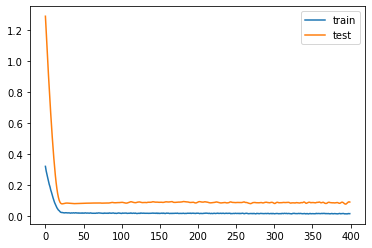

In [45]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()

In [46]:
x_test

array([[[ 1.03030303,  0.83333333,  0.66666667]],

       [[ 0.75757576,  0.83333333,  0.83333333]],

       [[ 1.01818182,  0.83333333,  1.        ]],

       [[ 1.09090909,  1.        , -0.83333333]],

       [[ 0.93333333,  1.        , -0.66666667]],

       [[ 1.1030303 ,  1.        , -0.5       ]],

       [[ 1.35757576,  1.        , -0.33333333]],

       [[ 1.42424242,  1.        , -0.16666667]],

       [[ 1.80606061,  1.        ,  0.        ]],

       [[ 2.33333333,  1.        ,  0.16666667]],

       [[ 2.23636364,  1.        ,  0.33333333]],

       [[ 1.64242424,  1.        ,  0.5       ]],

       [[ 1.35757576,  1.        ,  0.66666667]],

       [[ 0.92727273,  1.        ,  0.83333333]]])

In [47]:
y_pred = model.predict(x_test)
ot = rs_pas.inverse_transform(y_pred)
ot

array([[430.16852],
       [394.2873 ],
       [403.4004 ],
       [446.28577],
       [435.0954 ],
       [471.62347],
       [516.661  ],
       [529.06384],
       [582.07886],
       [649.6471 ],
       [622.93994],
       [532.9927 ],
       [487.65677],
       [432.4246 ]], dtype=float32)

In [48]:
y_test_inv = rs_pas.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = rs_pas.inverse_transform(y_pred)
y_pred_inv

array([[430.16852],
       [394.2873 ],
       [403.4004 ],
       [446.28577],
       [435.0954 ],
       [471.62347],
       [516.661  ],
       [529.06384],
       [582.07886],
       [649.6471 ],
       [622.93994],
       [532.9927 ],
       [487.65677],
       [432.4246 ]], dtype=float32)

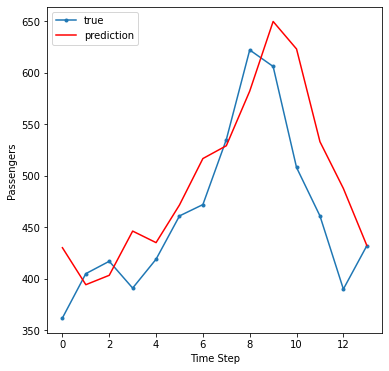

In [49]:
plt.figure(figsize=(6,6))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Passengers')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [50]:
#save the model
model.save('airline4-copy1.h5')

In [51]:
# evaluate the model performance
import math
trainScore = model.evaluate(x_train,y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.02 MSE (0.16 RMSE)
Test Score: 0.11 MSE (0.33 RMSE)


In [52]:
y_test_inv = rs_pas.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = rs_pas.inverse_transform(y_pred)

arr_1 = np.array(y_test_inv)
arr_2 = np.array(y_pred_inv)

actual = pd.DataFrame(data=arr_1.flatten(),columns=["actual"])
predicted = pd.DataFrame(data=arr_2.flatten(),columns = ["predicted"])

In [53]:
final = pd.concat([actual,predicted],axis=1)
final.head()

,actual,predicted
0,362.0,430.168518
1,405.0,394.287292
2,417.0,403.400391
3,391.0,446.285767
4,419.0,435.095398
